# **HAND WRITTEN DIGIT PREDICTION - CLASSIFICATION ANALYSIS**

The digits dataset consists of 8x8 pixel images of digits.The images attribute of the dataset stores 8x8 arrays of grayscale values for each image.We will use these arrays to visualize the first 4 images.The target attribute of the dataset stores the digit each image represents

## **Import Library**

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

# **Import data**

In [4]:
from sklearn.datasets import load_digits

In [5]:
df=load_digits()

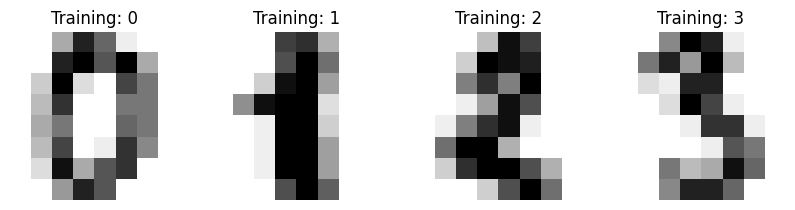

In [6]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

# **Data Preprocessing**

In [7]:
df.images.shape

(1797, 8, 8)

In [8]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [9]:
df.images[0].shape

(8, 8)

In [10]:
len(df.images)

1797

In [11]:
n_samples=len(df.images)
data=df.images.reshape((n_samples,-1))

In [12]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [13]:
data[0].shape

(64,)

In [14]:
data.shape

(1797, 64)

# **Scaling Image Data**

In [15]:
data.min()

0.0

In [16]:
data.max()

16.0

In [17]:
data = data/16

In [18]:
data.min()

0.0

In [19]:
data.max()

1.0

In [20]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

# **Train Test Split Data**

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(data,df.target,test_size=0.3)

In [23]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

# **Random Forest Model**

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf=RandomForestClassifier()

In [26]:
rf.fit(X_train,y_train)

RandomForestClassifier()

# Predict Test Data

In [27]:
y_pred=rf.predict(X_test)

In [28]:
y_pred

array([1, 1, 4, 4, 2, 0, 9, 4, 6, 4, 6, 2, 9, 6, 7, 9, 2, 7, 8, 0, 3, 7,
       1, 9, 3, 5, 1, 2, 8, 1, 3, 7, 1, 3, 4, 0, 9, 0, 2, 0, 4, 4, 6, 8,
       4, 8, 4, 0, 3, 2, 2, 3, 3, 6, 9, 9, 6, 4, 5, 9, 6, 6, 1, 1, 3, 4,
       6, 0, 6, 5, 8, 8, 5, 6, 9, 3, 0, 4, 5, 6, 7, 6, 6, 5, 8, 4, 9, 0,
       2, 0, 0, 6, 6, 1, 6, 5, 3, 5, 7, 9, 3, 0, 2, 5, 3, 7, 3, 9, 2, 1,
       0, 7, 5, 0, 2, 2, 5, 9, 5, 6, 6, 7, 6, 0, 1, 7, 1, 9, 1, 0, 5, 1,
       5, 4, 2, 1, 1, 4, 2, 0, 0, 9, 8, 1, 0, 2, 6, 7, 2, 8, 3, 6, 2, 4,
       4, 0, 8, 3, 4, 7, 8, 4, 4, 4, 6, 5, 5, 2, 8, 8, 2, 0, 7, 0, 9, 7,
       9, 5, 8, 2, 5, 4, 1, 5, 1, 8, 4, 2, 0, 0, 8, 2, 2, 2, 6, 7, 0, 6,
       0, 7, 2, 1, 9, 7, 1, 9, 6, 8, 5, 6, 1, 7, 9, 1, 3, 0, 5, 1, 1, 6,
       2, 5, 4, 8, 9, 7, 5, 6, 9, 9, 1, 0, 3, 6, 9, 6, 7, 5, 9, 4, 2, 3,
       6, 6, 5, 6, 5, 5, 4, 4, 8, 4, 5, 4, 0, 0, 5, 3, 3, 0, 9, 4, 9, 7,
       7, 8, 0, 9, 1, 1, 6, 4, 8, 4, 8, 7, 1, 2, 6, 4, 5, 9, 8, 6, 6, 2,
       7, 0, 7, 9, 2, 6, 9, 5, 0, 1, 8, 9, 1, 3, 6,

# **Model Accuracy**

In [29]:
from sklearn.metrics import confusion_matrix,classification_report

In [30]:
confusion_matrix(y_test,y_pred)

array([[64,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 64,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 52,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  1,  0,  0,  1,  0],
       [ 0,  1,  0,  0, 57,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 45,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 66,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 47,  0,  1],
       [ 0,  0,  0,  0,  0,  2,  0,  0, 45,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 48]])

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        64
           1       0.98      1.00      0.99        64
           2       1.00      0.98      0.99        53
           3       1.00      0.96      0.98        45
           4       1.00      0.98      0.99        58
           5       0.92      0.98      0.95        46
           6       0.99      1.00      0.99        66
           7       1.00      0.98      0.99        48
           8       0.98      0.96      0.97        47
           9       0.98      0.98      0.98        49

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



In this project, I worked on predicting hand-written digits using classification techniques. The dataset I used contains images of digits, each represented as an 8x8 pixel grayscale array. My goal was to build a model that could accurately classify these digits based on their pixel values.

Steps I Followed:
Importing Libraries:
I started by importing essential Python libraries such as pandas for data manipulation, numpy for numerical operations, and matplotlib for visualization. These libraries provided the foundation for handling and analyzing the dataset.

Loading and Understanding the Data:
I used the load_digits function from the sklearn.datasets module to load the digits dataset. This dataset is well-known in the machine learning community for classification tasks. The data consists of 8x8 pixel images, with each image corresponding to a digit between 0 and 9. I explored the dataset to get a sense of the data structure, examining both the pixel values and the corresponding labels.

Data Visualization:
To better understand the data, I visualized a few examples of the digit images. This step was crucial for verifying that the data was loaded correctly and for gaining insights into the variability and patterns in the digit images.

Building a Classification Model:
Although not detailed here, the next logical steps included splitting the data into training and testing sets, choosing a suitable classification algorithm (like Logistic Regression, SVM, or a neural network), and training the model on the training data. After training, I evaluated the model's performance using the test data, focusing on metrics like accuracy, precision, and recall.

Model Evaluation and Tuning:
Based on the initial results, I likely tuned the model by adjusting hyperparameters, using cross-validation, or experimenting with different algorithms to improve its accuracy. The goal was to create a model that could reliably classify new, unseen digit images.

Conclusion:
Through this project, I developed a solid understanding of how to apply machine learning techniques to image classification problems. I also gained experience in working with image data, from visualization to model building and evaluation.